# Dette Program bruge til at lave samme model som før nu med Tobin's Q

## Det første step er til at hente data ind. Dette step er præcis det samme som i Program til seminar

In [152]:
# nedenstående kode er til at hente data og finde ud af hvor mange observationer der er pr. firma i dataen
# datasættet består af 25 observationer pr. firma der er 158 firmaer i alt

import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Excel file
# hent data fra excel filen 'financielle_data_renset.xlsx'
data = pd.read_excel('financielle_data_renset.xlsx')

# sorter data efter firma kode og år med den ældste år først
data = data.sort_values(by=['firma kode', 'year'])

# i data filen 'data' laves en variable kaldt *growth* som er den procentvise vækst i 'Total Revenue' fra år til år 
data['Growth']= data['Total Revenue'].pct_change() * 100

# Group by 'firma kode' and calculate 3-year rolling average
data['risk average'] = data.groupby('firma kode')['EBITDA/Tot Assets, %'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate deviation from the rolling average
data['risk'] = data['EBITDA/Tot Assets, %'] - data['risk average']

data.head()  # Display the first few rows of the DataFrame


### det her nede er en test af data
# Step 2: Count the number of observations per "firma kode"
#obs_per_firm = data['firma kode'].value_counts()

# Step 3: Print or save the result
#print(obs_per_firm)

# make a variable if the number of observations is not 25 
#obs_per_firm_wrong = obs_per_firm[obs_per_firm != 25]

#print(obs_per_firm_wrong)


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent","Long Term Debt to Total Capital, Percent",Net Debt To EBITDA (Daily Time Series Ratio),"Effective Tax Rate, (%)",Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk
24,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
23,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
22,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
21,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
20,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0


In [153]:
## merge with the dataset 'branche data.xlsx'

# load data 'branche data.xlsx'
branche_data = pd.read_excel('branche data.xlsx')

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' 
# with 'data' as a left join 'branche_data' as b on 'firma kode' = 'firma kode'
# from b take only variable 'Company Common Name' and 'NAICS Sector Name'               !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge = pd.merge(data, branche_data[['Firma kode', 'Company Common Name', 'NAICS Sector Name']], left_on='firma kode', right_on='Firma kode', how='left')
data_merge.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information


### Her skal der nu merges med Tobin's Q datasættet

In [ ]:
## merge with the dataset 'branche data.xlsx'

# load data ' *** tobins q *** data.xlsx'
tobin_data = pd.read_excel('tobins Q.xlsx')

# sorter data efter firma kode og år med den ældste år først
#tobin_data = tobin_data.sort_values(by=['firma kode', 'year'])

#tobin_data.head(5)

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' and 'year' = 'year'
# with 'data' as a left join 'tobin_data' as b on 'firma kode' = 'firma kode' and 'year' = 'year'
# from b take only variables 'Market Value for Company', 'Total Assets, Reported'  and 'Total Debt'  !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge_2 = pd.merge(data_merge, tobin_data[['firma kode', 'year', 'Market Value for Company', 'Total Assets, Reported', 'Total Debt']], left_on=['firma kode', 'year'], right_on=['firma kode', 'year'], how='left')

# gnerer Tobins Q = ('Market Value for Company' + 'Total Debt') / 'Total Assets, Reported'
data_merge_2['Tobins Q'] = (data_merge_2['Market Value for Company']) / data_merge_2['Total Assets, Reported']

data_merge_2.head(40)  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,Market Value for Company,"Total Assets, Reported",Total Debt,EBIT,EBITDA
0,ROCKb.CO,2024-12-30,30,12,2024,5.495898e+10,2.899074e+10,9.096888e+08,5.100222e+09,7.061273e+09
1,ROCKb.CO,2023-12-29,29,12,2023,4.265786e+10,2.649115e+10,8.571982e+08,3.928204e+09,5.806586e+09
2,ROCKb.CO,2022-12-30,30,12,2022,3.520846e+10,2.548511e+10,1.732214e+09,2.988627e+09,4.743145e+09
3,ROCKb.CO,2021-12-30,30,12,2021,5.670367e+10,2.290060e+10,6.691733e+08,2.981539e+09,4.476026e+09
4,ROCKb.CO,2020-12-30,30,12,2020,4.749806e+10,2.041713e+10,1.086334e+09,2.537260e+09,3.884017e+09


## Nu filterer vi på samme måde som før for null rækker og for finansielle virksomheder 

In [155]:
# data test 
# make a copi of data called data_test
data_test = data_merge_2.copy()

# define all columns
cols_to_check = [
    "Total Debt to Total Equity, Percent",
    "Effective Tax Rate, (%)",
    "Quick Ratio",
    "EBITDA Margin, Percent",
    "Total Revenue",
    "Total Cash Dividends Paid, Cumulative"
    #"Market Value for Company", # tjek om det er det rigtige navn
    #"Total Debt", # tjek om det er det rigtige navn
    #"Total Assets, Reported" # tjek om det er det rigtige navn
]


# make the data_test sort out all obs if if alle variablerne er 0
data_test_1 = data_test[
    (data_test[cols_to_check] != 0).any(axis=1)  # Keep rows where at least one column is not zero
]


# Keep only rows where *all* three columns are present (not NaN)
cols = ["Market Value for Company", "Total Assets, Reported", "Total Debt"]

data_test_2 = data_test_1.dropna(subset=cols)

# ‑‑ or, if you prefer an explicit boolean mask ‑‑
mask = data_test_1[cols].notna().all(axis=1)
data_test_2 = data_test_1[mask]

# drop rows if 'NAICS Sector Name' is == "Finance and Insurance"
data_test_3 = data_test_2[data_test_1['NAICS Sector Name'] != "Finance and Insurance"]

# drop rows if debt = 0
data_test_3 = data_test_3[data_test_3['Total Debt'] != 0]

# make a variable called 'debt to assets ratio' by dividing 'Total Debt to Total Equity, Percent' with 'Tot Assets/Comm Eqty'
data_test_3['debt to assets ratio'] = data_test_3['Total Debt to Total Equity, Percent'] / data_test_3['Tot Assets/Comm Eqty']
data_test_3['debt to assets ratio 2'] = (data_test_3['Total Debt'] / (data_test_3['Market Value for Company'] + data_test_3['Total Debt'] )) * 100


data_test_3.head()  # Display the first few rows of the DataFrame

C:\Users\marcu\AppData\Local\Temp\ipykernel_18244\3634247311.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_3 = data_test_2[data_test_1['NAICS Sector Name'] != "Finance and Insurance"]


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,risk,Firma kode,Company Common Name,NAICS Sector Name,Market Value for Company,"Total Assets, Reported",Total Debt,Tobins Q,debt to assets ratio,debt to assets ratio 2
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,-18.400730,5PG.OL,5Th Planet Games A/S,Information,8.744197e+07,63240000.0,6891000.0,1.382700,10.896584,7.304975
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,-12.385118,5PG.OL,5Th Planet Games A/S,Information,5.776310e+07,29811000.0,5081000.0,1.937644,17.044044,8.085086
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,-3.900972,5PG.OL,5Th Planet Games A/S,Information,2.015621e+08,70188000.0,3148000.0,2.871746,4.485097,1.537785
19,5PG.OL,2019-12-31 00:00:00,31,12,2019,-64.654729,-97.175108,-23.684731,1.902897,44.061962,...,12.022183,5PG.OL,5Th Planet Games A/S,Information,1.500972e+07,13267000.0,3072000.0,1.131358,23.155197,16.989533
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,5.856459,5PG.OL,5Th Planet Games A/S,Information,8.925154e+07,27380000.0,2271000.0,3.259735,8.294375,2.481356


hvis data sorteringen virker køre nedstående kode

In [156]:
data_test= data_test_3.copy()

## Her filter vi igen på 5pct.

In [157]:
# List of variables to trim
trim_vars = ['Tobins Q', 'Total Debt to Total Equity, Percent']

# Create a copy to work with
data_trimmed = data_test.copy()

for var in trim_vars:
    lower = data_trimmed[var].quantile(0.00)
    upper = data_trimmed[var].quantile(0.95)
    data_trimmed = data_trimmed[(data_trimmed[var] >= lower) & (data_trimmed[var] <= upper)]

#### igen ploter vi data

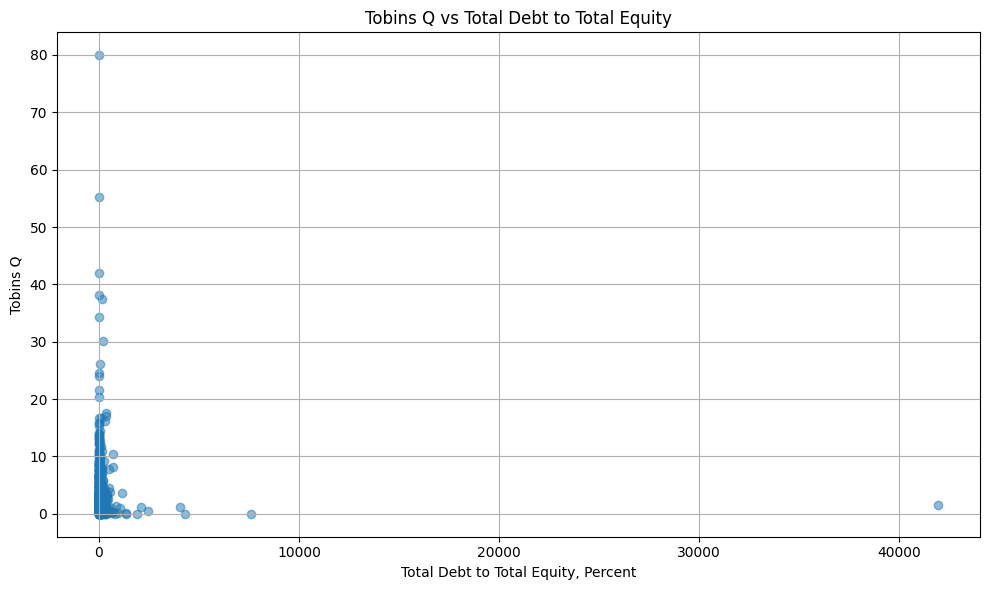

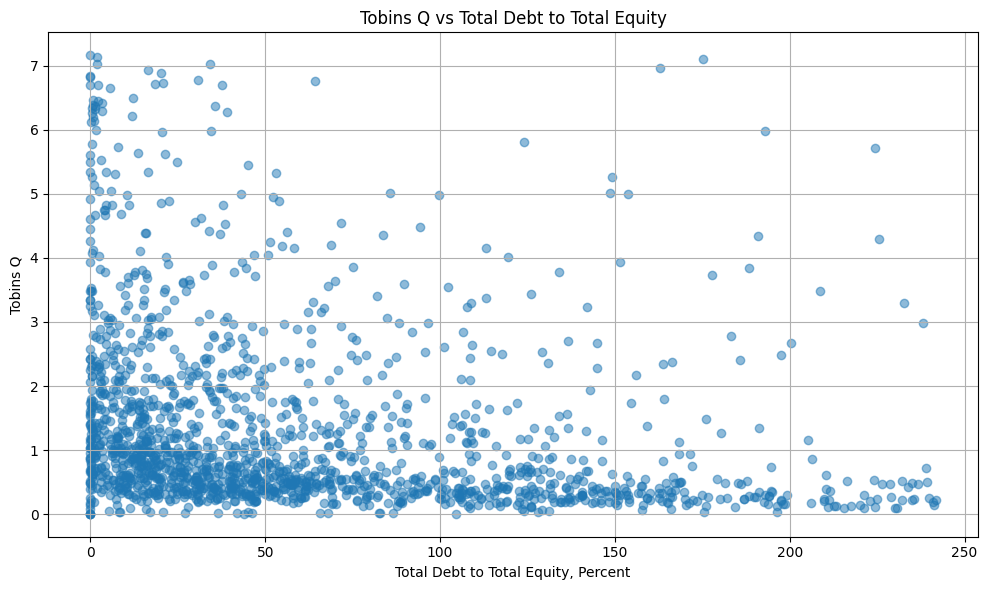

In [158]:
# Check the shape of the trimmed data
data_filter = data_test.copy()

# first plot 'Tobins Q' against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Total Debt to Total Equity, Percent'], data_filter['Tobins Q'], alpha=0.5)  
plt.title('Tobins Q vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('Tobins Q')
plt.grid(True)
plt.tight_layout()
plt.savefig('Tobins Q_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['Total Debt to Total Equity, Percent'], data_trimmed['Tobins Q'], alpha=0.5)  
plt.title('Tobins Q vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('Tobins Q')
plt.grid(True)
plt.tight_layout()
plt.savefig('Tobins Q_vs_TDTE_trimmed.png', dpi=300)  # Save figure

## Her laver vi Pooled ols på tobins Q

In [159]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['Tobins Q']  # dependent variable 'Tobins Q'
X = data_trimmed[['Total Debt to Total Equity, Percent', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:               Tobins Q   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     18.71
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.27e-18
Time:                        09:32:36   Log-Likelihood:                -2644.6
No. Observations:                1559   AIC:                             5303.
Df Residuals:                    1552   BIC:                             5341.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


## Her laver vi FE på år og branche for tobins Q

In [160]:
# 1. Start fresh
data_fe_both = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_both['year'] = data_fe_both['year'].astype(str)
data_fe_both['branche'] = data_merge['NAICS Sector Name'].astype(str)

#data_fe_both.head()

In [161]:
# 1. Start fresh
data_fe_both = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_both['year'] = data_fe_both['year'].astype(str)
data_fe_both['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars = [
    'Tobins Q',
    'Total Debt to Total Equity, Percent',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_both = data_fe_both[model_vars].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_TOBIN_FE_both = smf.ols(
    formula='Q("Tobins Q") ~ Q("Total Debt to Total Equity, Percent") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_both
).fit(cov_type='HC3')

print(model_TOBIN_FE_both.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Tobins Q")   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.45e-77
Time:                        09:32:37   Log-Likelihood:                -2524.1
No. Observations:                1559   AIC:                             5134.
Df Residuals:                    1516   BIC:                             5364.
Df Model:                          42                                         
Covariance Type:                  HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


## ikke linear sammenhæng p Tobins Q

In [162]:
# 1. Start fresh
data_fe_both_ROE_2 = data_trimmed.copy()

# 1.1 add squared variable
data_fe_both_ROE_2['Debt_squared'] = data_fe_both_ROE_2['Total Debt to Total Equity, Percent'] ** 2

# 2. Add fixed effect variables
data_fe_both_ROE_2['year'] = data_fe_both_ROE_2['year'].astype(str)
data_fe_both_ROE_2['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROE_2 = [
    'Tobins Q',
    'Total Debt to Total Equity, Percent',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_both_ROE_2 = data_fe_both_ROE_2[model_vars_ROE_2].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_ROE_FE_both_2 = smf.ols(
    formula='Q("Tobins Q") ~ Q("Total Debt to Total Equity, Percent") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_both_ROE_2
).fit(cov_type='HC3')

print(model_ROE_FE_both_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Q("Tobins Q")   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     13.50
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.86e-77
Time:                        09:32:37   Log-Likelihood:                -2506.1
No. Observations:                1559   AIC:                             5100.
Df Residuals:                    1515   BIC:                             5336.
Df Model:                          43                                         
Covariance Type:                  HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '
